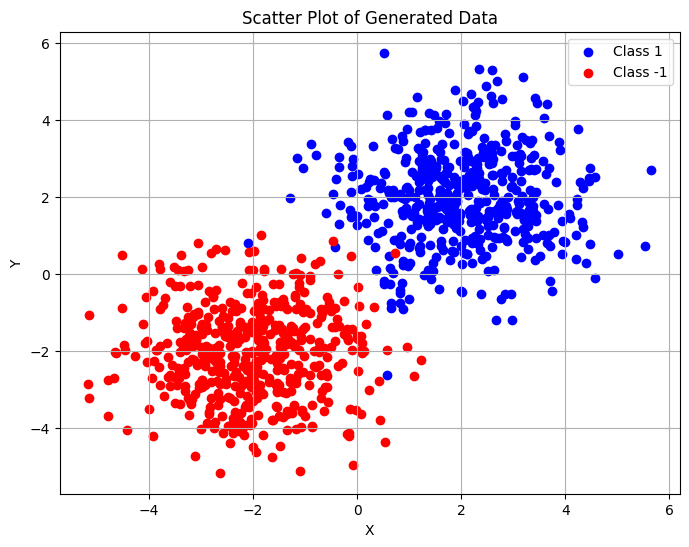

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate 2D data points from two Gaussian distributions
def classifyTwoGaussData(numSamples: int, noise: float):
    points = []

    # Function to generate Gaussian data points
    def genGauss(cx: float, cy: float, label: int):
        varianceScale = lambda x: 0.5 + x * 3.5  # Scale the variance based on 'noise'
        variance = varianceScale(noise)

        for i in range(numSamples // 2):
            x = np.random.normal(cx, variance)
            y = np.random.normal(cy, variance)
            points.append({"x": x, "y": y, "label": label})

    # Generate data points for Gaussian distributions
    genGauss(2, 2, 1)     # Gaussian with positive examples.
    genGauss(-2, -2, -1)  # Gaussian with negative examples.
    return points

# Generate data
numSamples = 1000
noise = 0.2
generated_data = classifyTwoGaussData(numSamples, noise)

# Separate data points and labels for plotting
data_points = np.array([(point["x"], point["y"]) for point in generated_data])
labels = np.array([point["label"] for point in generated_data])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(data_points[labels == 1, 0], data_points[labels == 1, 1], c='b', label='Class 1')
plt.scatter(data_points[labels == -1, 0], data_points[labels == -1, 1], c='r', label='Class -1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Generated Data')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def mlp_model(architecture_info, input_dim):
    model = Sequential()
    model.add(Dense(architecture_info[0]['neurons'], input_dim=input_dim, activation=architecture_info[0]['activation']))
    for i in range(1, len(architecture_info)):
        model.add(Dense(architecture_info[i]['neurons'], activation=architecture_info[i]['activation']))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [3]:
architecture_info = [{'neurons': 64, 'activation': 'relu'}, {'neurons': 64, 'activation': 'relu'}, {'neurons': 1, 'activation': 'sigmoid'}]
input_dim = 2
model = mlp_model(architecture_info, input_dim)
model.fit(data_points, labels, epochs=150, batch_size=10)


Epoch 1/150
100/100 [==============================] - 0s 338us/step - loss: -4.2987 - accuracy: 0.4930
Epoch 2/150
100/100 [==============================] - 0s 304us/step - loss: -49.6067 - accuracy: 0.4880
Epoch 3/150
100/100 [==============================] - 0s 325us/step - loss: -227.6985 - accuracy: 0.4840
Epoch 4/150
100/100 [==============================] - 0s 320us/step - loss: -665.6616 - accuracy: 0.4840
Epoch 5/150
100/100 [==============================] - 0s 324us/step - loss: -1470.6320 - accuracy: 0.4850
Epoch 6/150
100/100 [==============================] - 0s 334us/step - loss: -2752.0303 - accuracy: 0.4860
Epoch 7/150
100/100 [==============================] - 0s 305us/step - loss: -4582.1143 - accuracy: 0.4860
Epoch 8/150
100/100 [==============================] - 0s 328us/step - loss: -7033.1787 - accuracy: 0.4860
Epoch 9/150
100/100 [==============================] - 0s 313us/step - loss: -10185.5547 - accuracy: 0.4860
Epoch 10/150
100/100 [=====================

313/313 [==============================] - 0s 210us/step


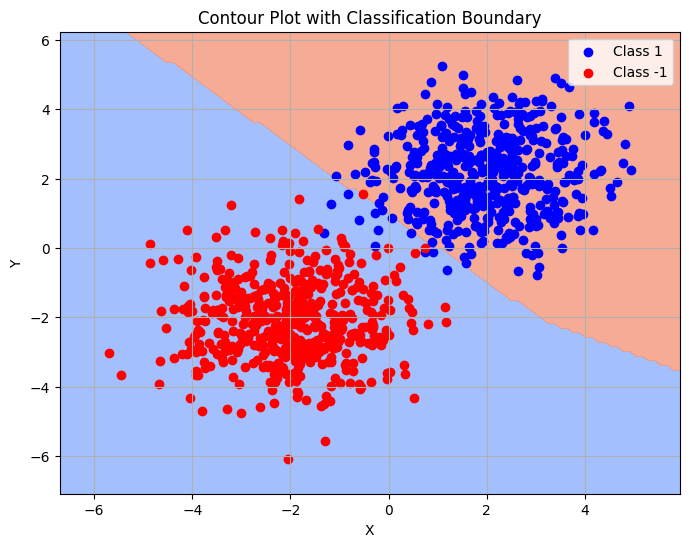

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ... (previous code to create the data_points and labels)

# Create a meshgrid to cover the entire range of the data space
x_min, x_max = data_points[:, 0].min() - 1, data_points[:, 0].max() + 1
y_min, y_max = data_points[:, 1].min() - 1, data_points[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Flatten the meshgrid points and make predictions for each point
grid_points = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(grid_points)

# Reshape the predictions to match the shape of the meshgrid
zz = predictions.reshape(xx.shape)

# Plot the contour plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.8)
plt.scatter(data_points[labels == 1, 0], data_points[labels == 1, 1], c='b', label='Class 1')
plt.scatter(data_points[labels == -1, 0], data_points[labels == -1, 1], c='r', label='Class -1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot with Classification Boundary')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np

# Function to generate the contour plot based on user inputs
def generate_contour_plot(model, data_points, labels):
    x_min, x_max = data_points[:, 0].min() - 1, data_points[:, 0].max() + 1
    y_min, y_max = data_points[:, 1].min() - 1, data_points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Flatten the meshgrid points and make predictions for each point
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid_points)

    # Reshape the predictions to match the shape of the meshgrid
    zz = predictions.reshape(xx.shape)

    # Plot the contour plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.8)
    plt.scatter(data_points[labels == 1, 0], data_points[labels == 1, 1], c='b', label='Class 1')
    plt.scatter(data_points[labels == -1, 0], data_points[labels == -1, 1], c='r', label='Class -1')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Contour Plot with Classification Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main Streamlit app
def main():
    st.title('Neural Network Configuration')

    # Plus and minus buttons for Hidden Layers
    num_hidden_layers = st.number_input('Number of Hidden Layers', min_value=1, step=1, value=1)

    # Dynamic creation of hidden layers and their neurons
    architecture_info = []
    for i in range(num_hidden_layers):
        layer_neurons = st.number_input(f'Number of neurons in Hidden Layer {i+1}', min_value=1, step=1, value=10)
        architecture_info.append({'neurons': layer_neurons, 'activation': 'relu'})
        # layers_info.append(layer_neurons)

    # Checkboxes for functions
    functions = st.multiselect('Functions', ['x1', 'x2', 'x1^2', 'x2^2', 'sin(x1)'], default=['x1'])

    # Sliders for Learning Rate and Epochs
    learning_rate = st.slider('Learning Rate', min_value=0.01, max_value=1.0, step=0.01, value=0.1)
    epochs = st.slider('Epochs', min_value=1, max_value=100, step=1, value=10)

    # Button to generate the contour plot
    if st.button('Generate Contour Plot'):
        input_dim = len(functions)
        model = mlp_model(architecture_info, input_dim)
        model.fit(data_points, labels, epochs=epochs, batch_size=10, learning_rate=learning_rate)

        generate_contour_plot(model, data_points, labels)

if __name__ == '__main__':
    main()


2023-08-04 15:43:12.622 
  command:

    streamlit run /Users/kalash/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [5]:
import tensorflow as tf
print(tf.__version__)

2.13.0


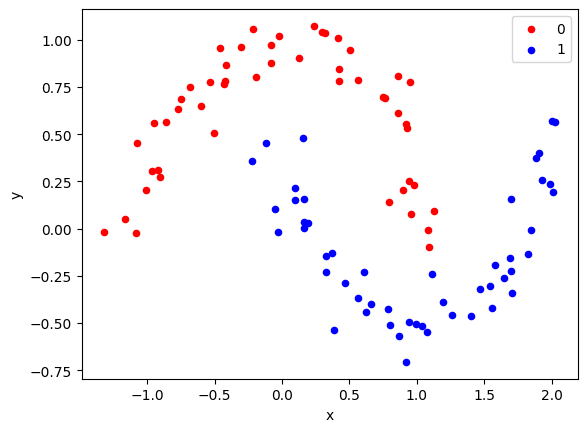

In [6]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

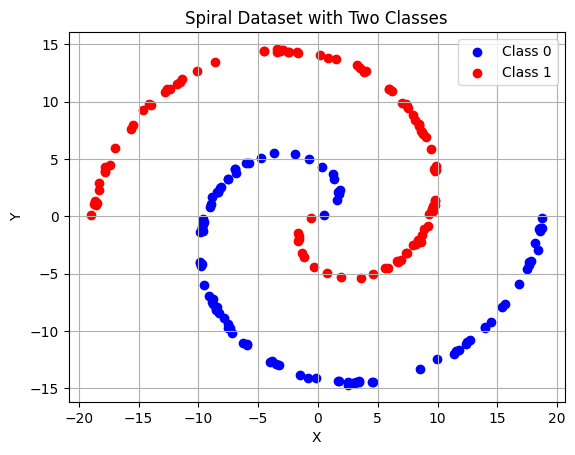

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(num_points_per_spiral, noise=0.1):
    # Generate angles for the spirals
    theta = np.sqrt(np.random.rand(num_points_per_spiral)) * (2 * np.pi)
    # Class 0 spiral points
    r0 = 3 * theta + np.random.randn(num_points_per_spiral) * noise
    x0 = r0 * np.cos(theta)
    y0 = r0 * np.sin(theta)
    
    # Class 1 spiral points
    r1 = 3 * theta + np.random.randn(num_points_per_spiral) * noise
    x1 = -r1 * np.cos(theta)
    y1 = -r1 * np.sin(theta)

    # Combine the points and labels for both classes
    class_0_points = np.column_stack((x0, y0))
    class_1_points = np.column_stack((x1, y1))
    data_points = np.vstack((class_0_points, class_1_points))
    labels = np.hstack((np.zeros(num_points_per_spiral), np.ones(num_points_per_spiral)))

    return data_points, labels

# Generate the dataset with 100 points for each class and noise level of 0.1
num_points_per_spiral = 100
data_points, labels = generate_spiral_data(num_points_per_spiral, noise=0.1)

# Plot the generated dataset
plt.scatter(data_points[labels == 0, 0], data_points[labels == 0, 1], c='b', label='Class 0')
plt.scatter(data_points[labels == 1, 0], data_points[labels == 1, 1], c='r', label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Spiral Dataset with Two Classes')
plt.legend()
plt.grid(True)
plt.show()